# Atlas notebooks

***

> This notebook reproduces and extends parts of the figures and products of the AR6-WGI Atlas. It is part of a notebook collection available at https://github.com/IPCC-WG1/Atlas for reproducibility and reusability purposes. This work is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0).
>
> ![Creative Commons License >](https://i.creativecommons.org/l/by/4.0/88x31.png)

## Computing and visualizing regional climate change (temperature vs precipitation) for reference regions

24/6/2021

**M. Iturbide** (Santander Meteorology Group. Institute of Physics of Cantabria, CSIC-UC, Santander, Spain).

This notebook reproduces and extends parts of the regional figures of the AR6-WGI Atlas chapter. In particular, the scatter plots of regional climate change temperature vs. precipitation for the AR6 reference regions using CMIP5 and CMIP6 datasets (Figures Atlas.13, 16 ,17, 21, 22, 24, 26 and 29). This notebook builds on other sections of the repository: 1) auxiliary scripts from [reproducibility](https://github.com/IPCC-WG1/Atlas/tree/main/reproducibility), and 2) CMIP5/6 - CORDEX [aggregated datasets](https://github.com/IPCC-WG1/Atlas/tree/main/datasets-aggregated-regionally) for the WGI reference regions.

Before starting, the size of the graphic space of this notebook is defined to generate figures of an appropriate size:

In [1]:
library(repr)
# Change plot size
options(repr.plot.width=14, repr.plot.height=12)

### Easy and direct production of the figures

#### Load packages and functions
This notebook is based on the R programming language and requires packages:

 * `magrittr` to pipe (`%>%`) sequences of operations
 * `httr` to handle URLs and HTTP
 * `lattice` and `latticeExtra` to produce the figures
 * `gridExtra` to produce the final panel of plots

In [2]:
library(magrittr)
library(httr)
library(lattice)
library(latticeExtra)
library(gridExtra)

The main function to generate the boxplots and scatterplots is `computeFigures`, which internally uses functions `computeDeltas` and `computeOffset`, all available in this repository. To load these functions in the working environment use the `source` R base function as follows.

In [3]:
source("../datasets-aggregated-regionally/scripts/computeDeltas.R")
source("../datasets-aggregated-regionally/scripts/computeFigures.R")
source("../datasets-aggregated-regionally/scripts/computeOffset.R")

#### Parameter setting 

We define next some parameters, such as the seasons to show in the Precipitation vs Temperature scatterplots. E.g. for boreal winter and summer define:

In [4]:
scatter.seasons <- list(c(12, 1, 2), 6:8)

Select baseline period (e.g. AR6 reference period in this example). Available years in the datasets are 1850-1900 and 1950-2100.

In [5]:
ref.period <- 1995:2014

Select the area, i.e. "land", "sea" or "landsea"

In [6]:
area <- "land"

Select reference regions (see reference-regions in this repository). Use `world` to generate global results.

In [7]:
regions <- c("ECA", "EAS"); 

Select a CORDEX domain from the following options: SAM, CAM, NAM, AFR, WAS, EAS, AUS, ANT, ARC, SEA and EUR

In [8]:
cordex.domain <- "EAS"

Finally, select figure axes ranges (ylim for temperature, xlim for precipitation percentage). 
Leave it as NULL for automatic axes ranges

In [9]:
ylim <- NULL
xlim <- NULL

#### Compute delta changes and figures

We are ready to apply the `computeFigures` function.

In [10]:
fig <- computeFigures(regions = regions,
                      cordex.domain = cordex.domain,
                      area = area, 
                      ref.period = ref.period, 
                      scatter.seasons = scatter.seasons,
                      xlim = xlim,
                      ylim = ylim)

[2023-06-27 12:07:55] Computing annual delta changes for the Boxplot of region ECA

[2023-06-27 12:07:55] Computing CMIP5..

[2023-06-27 12:07:59] Computing CMIP6..

[2023-06-27 12:08:03] Computing CORDEX..

[2023-06-27 12:08:38] Computing seasonal delta changes for the Scatterplots of region ECA

[2023-06-27 12:08:38] Computing CMIP5..

[2023-06-27 12:08:48] Computing CMIP6..

[2023-06-27 12:09:01] Computing CORDEX..

[2023-06-27 12:09:12] Computing annual delta changes for the Boxplot of region EAS

[2023-06-27 12:09:12] Computing CMIP5..

[2023-06-27 12:09:15] Computing CMIP6..

[2023-06-27 12:09:19] Computing CORDEX..

[2023-06-27 12:09:53] Computing seasonal delta changes for the Scatterplots of region EAS

[2023-06-27 12:09:53] Computing CMIP5..

[2023-06-27 12:10:04] Computing CMIP6..

[2023-06-27 12:10:16] Computing CORDEX..



The output of the above call (`fig`) is a list of `trellis` class objects that can be easily arranged and displayed using the `grid.arrange` function from the `gridExtra` library.

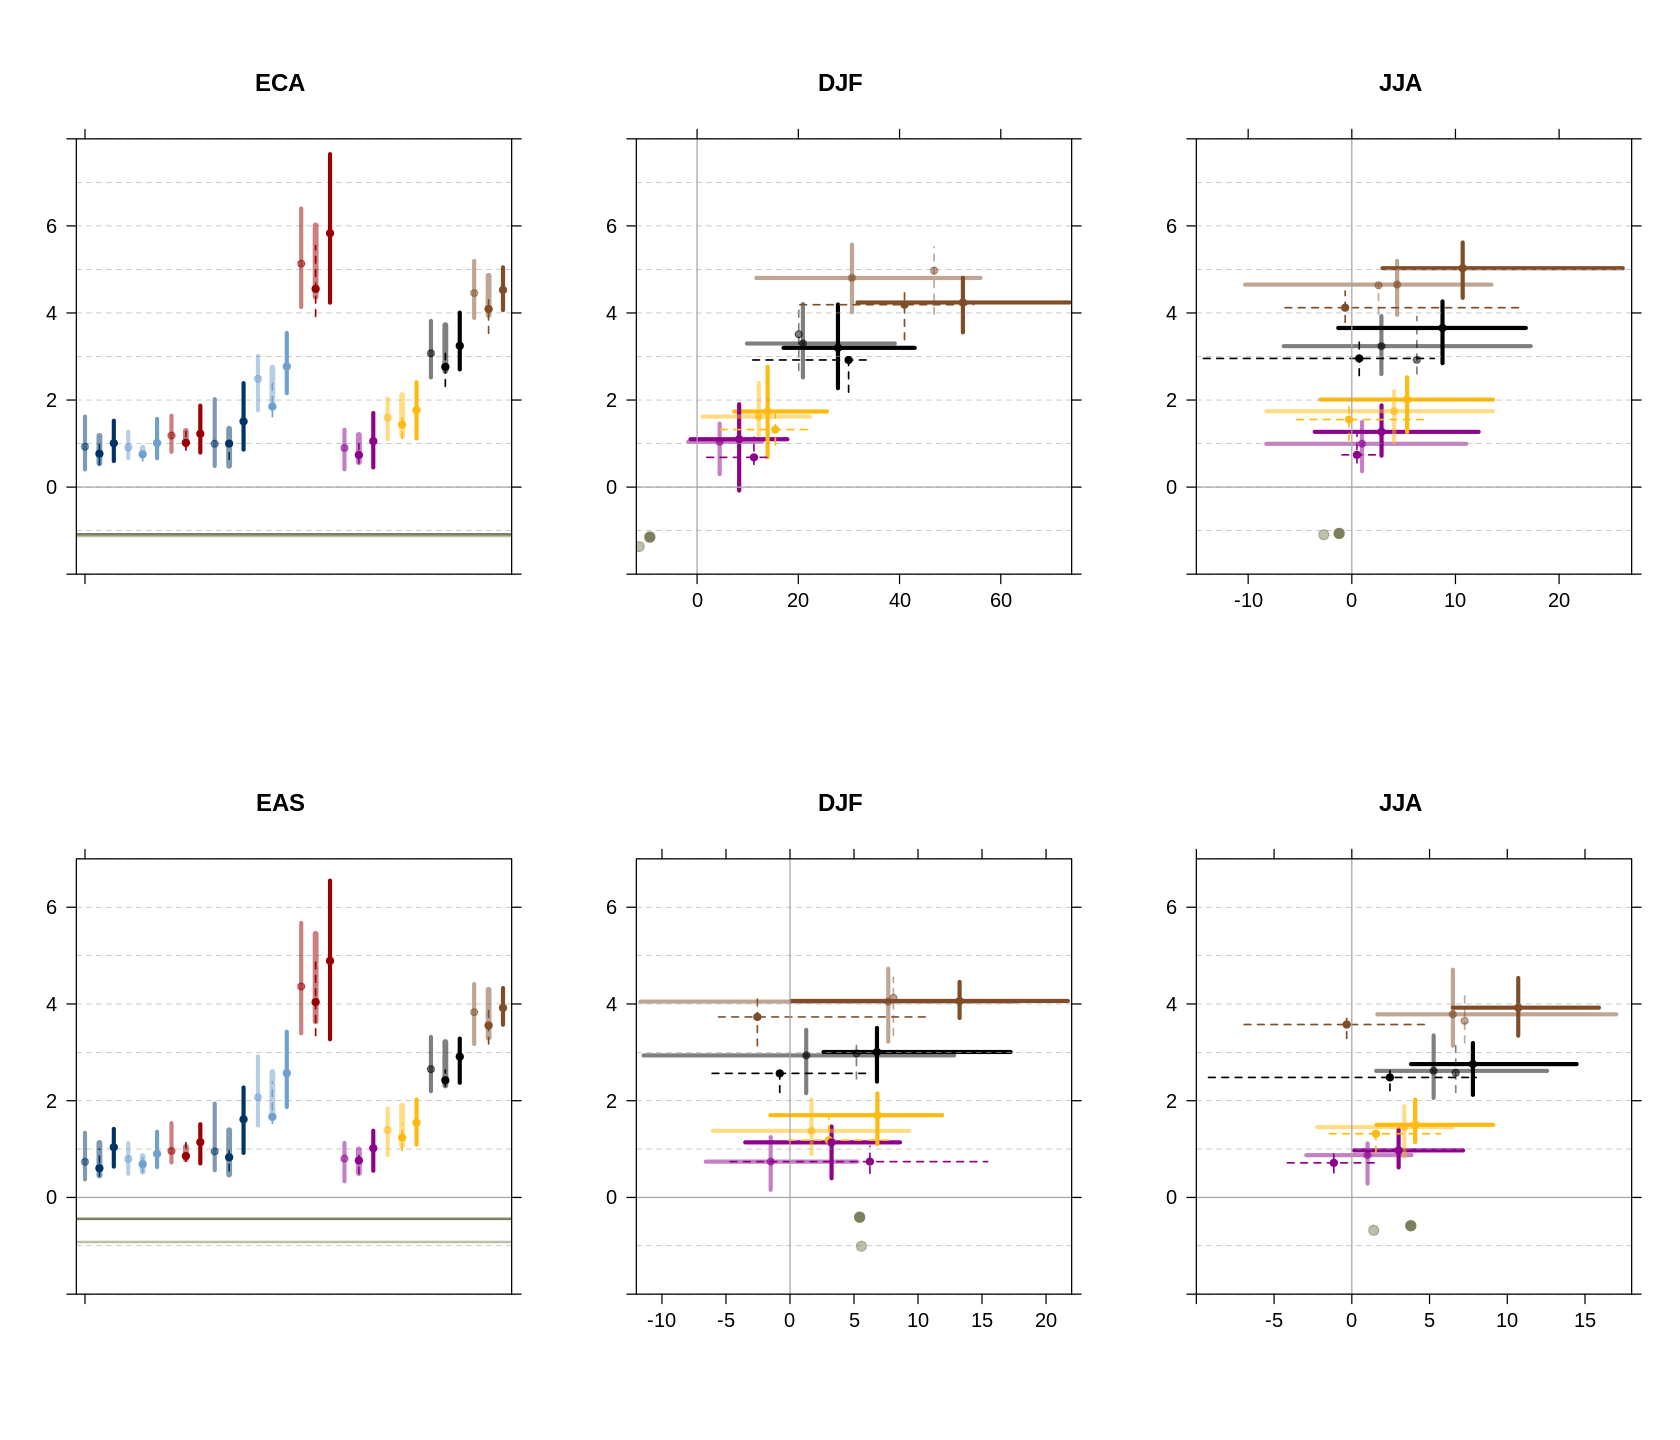

In [11]:
do.call("grid.arrange", fig)

The legend and axis label information of these panels is the one shown in the AR6-WGI Atlas chapter figures. The first column shows the annual temperature delta changes. The second and third columns, the scatterplots of the seasonal temperature and precipitation changes. Each row corresponds to a different reference region (ECA and EAS in this worked example).

We can now export the Figure as PDF. There are other export options such as `png` (type `?pdf` for help). The `Cairo` package provides other export options. 

In [12]:
outfilename <- sprintf("%s_%s_baseperiod_%s_ATvsAP.pdf",
  cordex.domain, area, paste(range(ref.period), collapse = "-")
)

pdf(outfilename, width = (length(scatter.seasons)+1)*10/2*0.85, height = length(regions)*10/2*0.85)
  do.call("grid.arrange", fig)
dev.off()

png 
  2

Play with arguments width and height to create different PDF sizes.

Set the object `cordex.domain` as `FALSE` to exclude CORDEX from the final figure. For example, in order to compute global delta changes, we can set: 

In [13]:
regions <- c("world")
cordex.domain <- FALSE

fig.w <- computeFigures(regions = regions,
                      cordex.domain = cordex.domain,
                      area = area, 
                      ref.period = ref.period, 
                      scatter.seasons = scatter.seasons,
                      xlim = xlim,
                      ylim = ylim)

[2023-06-27 12:10:26] Computing annual delta changes for the Boxplot of region world

[2023-06-27 12:10:26] Computing CMIP5..

[2023-06-27 12:10:30] Computing CMIP6..

[2023-06-27 12:10:34] Computing CORDEX..

[2023-06-27 12:11:09] Computing seasonal delta changes for the Scatterplots of region world

[2023-06-27 12:11:09] Computing CMIP5..

[2023-06-27 12:11:20] Computing CMIP6..

[2023-06-27 12:11:32] Computing CORDEX..



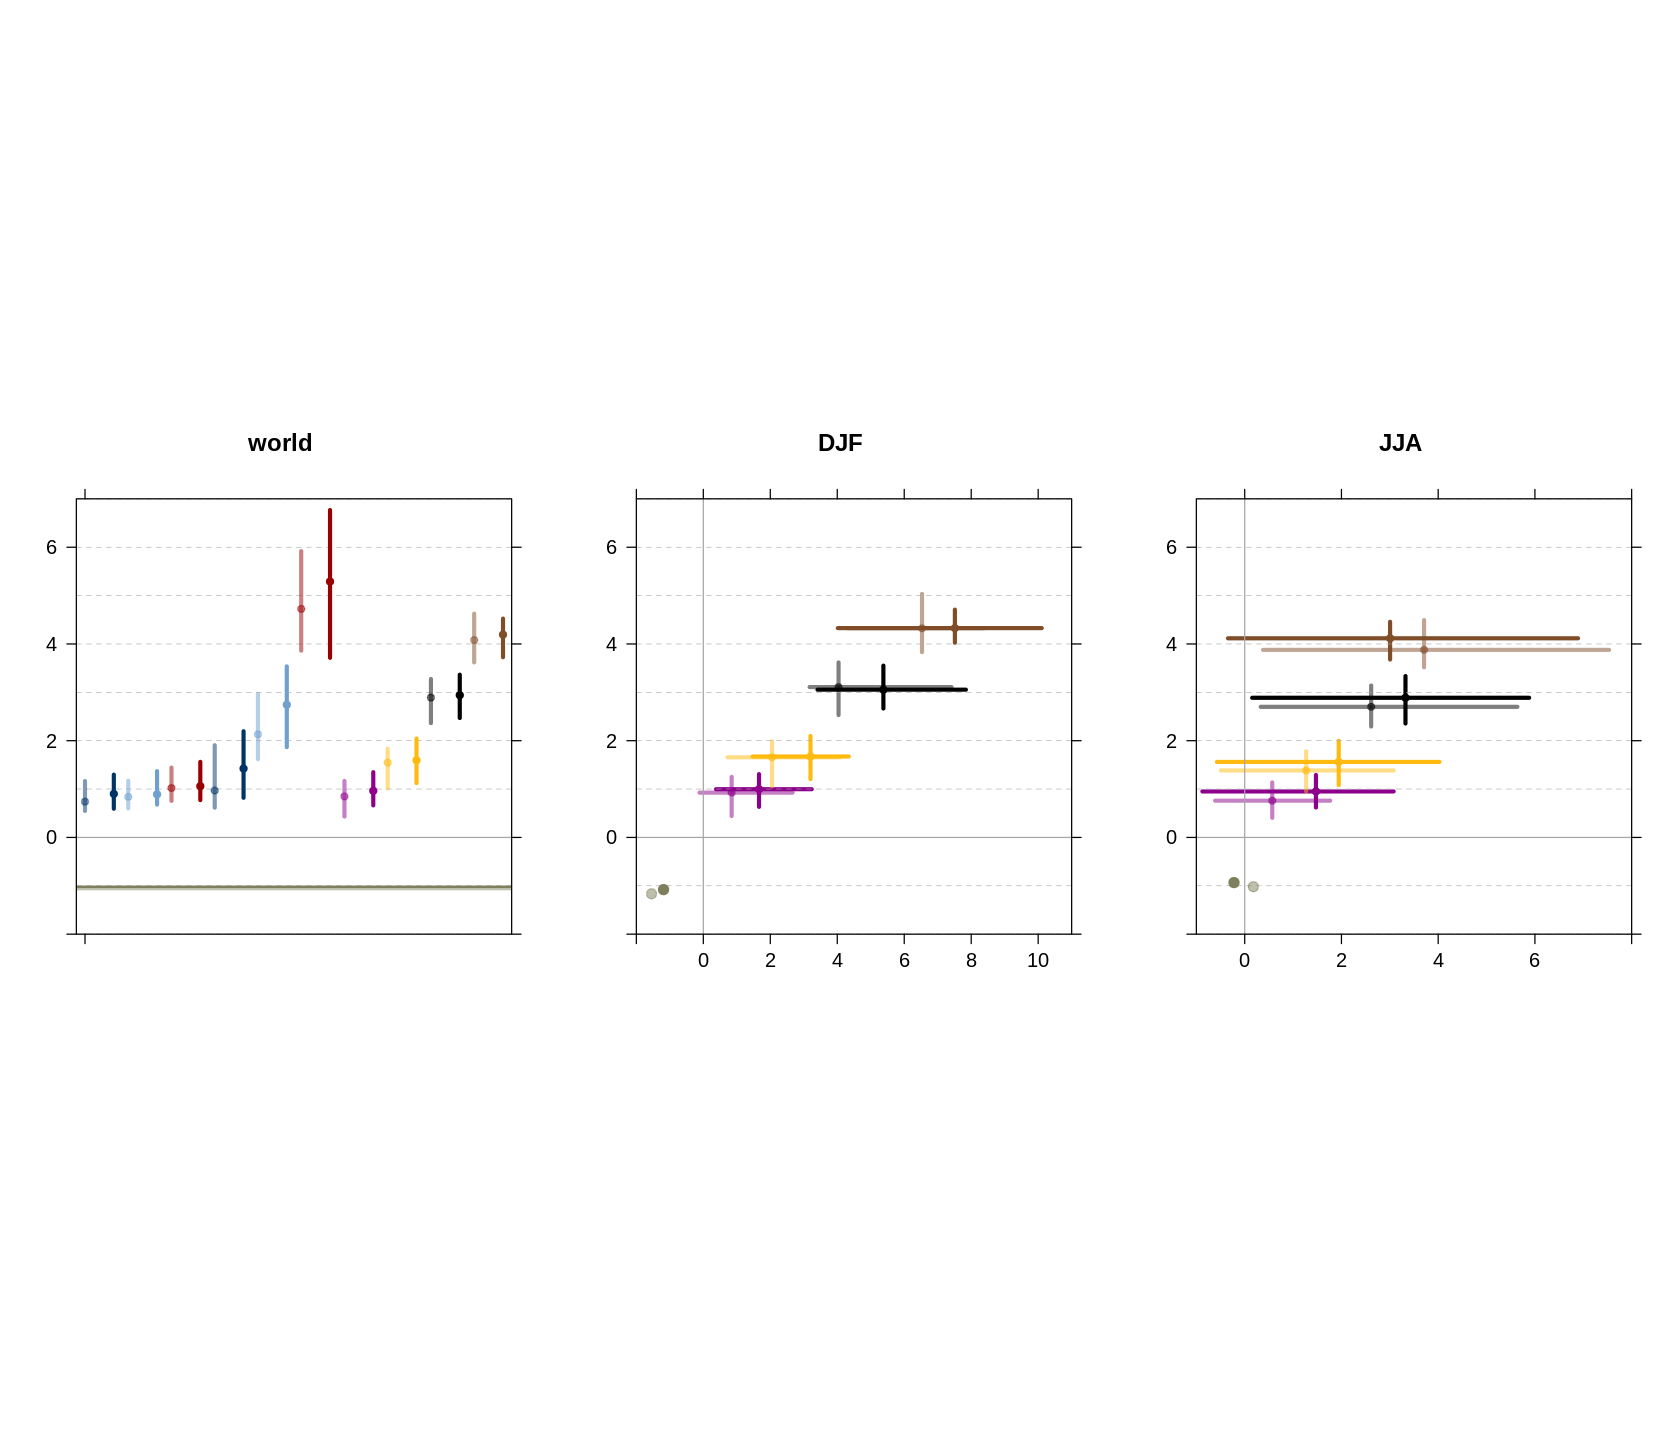

In [14]:
do.call("grid.arrange", fig.w)

We have easily reproduced parts of the AR6-WGI Atlas chapter figures using the function `computeFigures`. To extend the results shown in the Atlas chapter, just use different parameter settings above, e.g. additional seasons, alternative baselines, etc. 

Furthermore, functions `computeDeltas` and `computeOffset` (which are internally applied by `computeFigures`) can also be applied directly to obtain the data behind the boxplots/scatterplots allowing for further plotting options, which we explore next.

### Data matrices of delta changes

In this last example, we will compute CMIP5 annual temperature changes for different Global Warming Levels. Therefore, the following parameters are set.

In [15]:
project <- "CMIP5" # other options are CMIP6 and CORDEX
experiment <- "rcp85" 
var <- "tas"
season <- 1:12
ref.period <- 1986:2005
periods <- c("1.5", "2", "3", "4") 
area <- "land"
region <- c("NSA", "SES")
cordex.domain <- "SAM"

WL.cmip5 <- computeDeltas(project = project, 
                          var = var, 
                          experiment = experiment, 
                          season = season, 
                          ref.period = ref.period, 
                          periods = periods, 
                          area = area, 
                          region = region, 
                          cordex.domain = cordex.domain)


ACCESS1-0_r1i1p1.......rcp85------

ACCESS1-3_r1i1p1.......rcp85------

bcc-csm1-1_r1i1p1.......rcp85------

bcc-csm1-1-m_r1i1p1.......rcp85------

CanESM2_r1i1p1.......rcp85------

CCSM4_r1i1p1.......rcp85------

CESM1-BGC_r1i1p1.......rcp85------

CMCC-CM_r1i1p1.......rcp85------

CMCC-CMS_r1i1p1.......rcp85------

CNRM-CM5_r1i1p1.......rcp85------

CSIRO-Mk3-6-0_r1i1p1.......rcp85------

EC-EARTH_r12i1p1.......rcp85------

GFDL-CM3_r1i1p1.......rcp85------

GFDL-ESM2G_r1i1p1.......rcp85------

GFDL-ESM2G_r1i1p1.......rcp85------NO period

GFDL-ESM2M_r1i1p1.......rcp85------

GFDL-ESM2M_r1i1p1.......rcp85------NO period

HadGEM2-CC_r1i1p1.......rcp85------

HadGEM2-ES_r1i1p1.......rcp85------

inmcm4_r1i1p1.......rcp85------

inmcm4_r1i1p1.......rcp85------NO period

IPSL-CM5A-LR_r1i1p1.......rcp85------

IPSL-CM5A-MR_r1i1p1.......rcp85------

IPSL-CM5B-LR_r1i1p1.......rcp85------

MIROC-ESM_r1i1p1.......rcp85------

MIROC-ESM-CHEM_r1i1p1.......rcp85------

MIROC5_r1i1p1.......rcp85-

The `cordex.domain` parameter will be ignored unless the project is CORDEX (`project <- "CORDEX"`).

The output of the `computeDeltas` function is a list of matrices, each corresponding to a different reference region. Each column of the matrix corresponds to the warming levels set before. E.g. for the SES region:


In [16]:
WL.cmip5$SES

,rcp85,rcp85,rcp85,rcp85
ACCESS1-0_r1i1p1,0.9483292,1.4299875,2.460746,3.316342
ACCESS1-3_r1i1p1,1.1470417,1.5117708,2.427108,3.273229
bcc-csm1-1_r1i1p1,0.3947792,1.0546292,1.967492,3.097608
bcc-csm1-1-m_r1i1p1,0.7028111,0.8685500,1.773425,2.922742
CanESM2_r1i1p1,1.0021815,1.4546208,2.752146,3.829083
CCSM4_r1i1p1,0.6210013,1.1669375,2.127387,3.339333
CESM1-BGC_r1i1p1,0.6845792,1.1676000,2.062329,3.313937
CMCC-CM_r1i1p1,0.7409458,1.3561125,2.278021,3.326538
CMCC-CMS_r1i1p1,0.9705500,1.4402042,2.370708,3.405425
CNRM-CM5_r1i1p1,0.8366167,1.3981083,2.189842,3.274875


Let's plot the results for this region and each CMIP5 model.

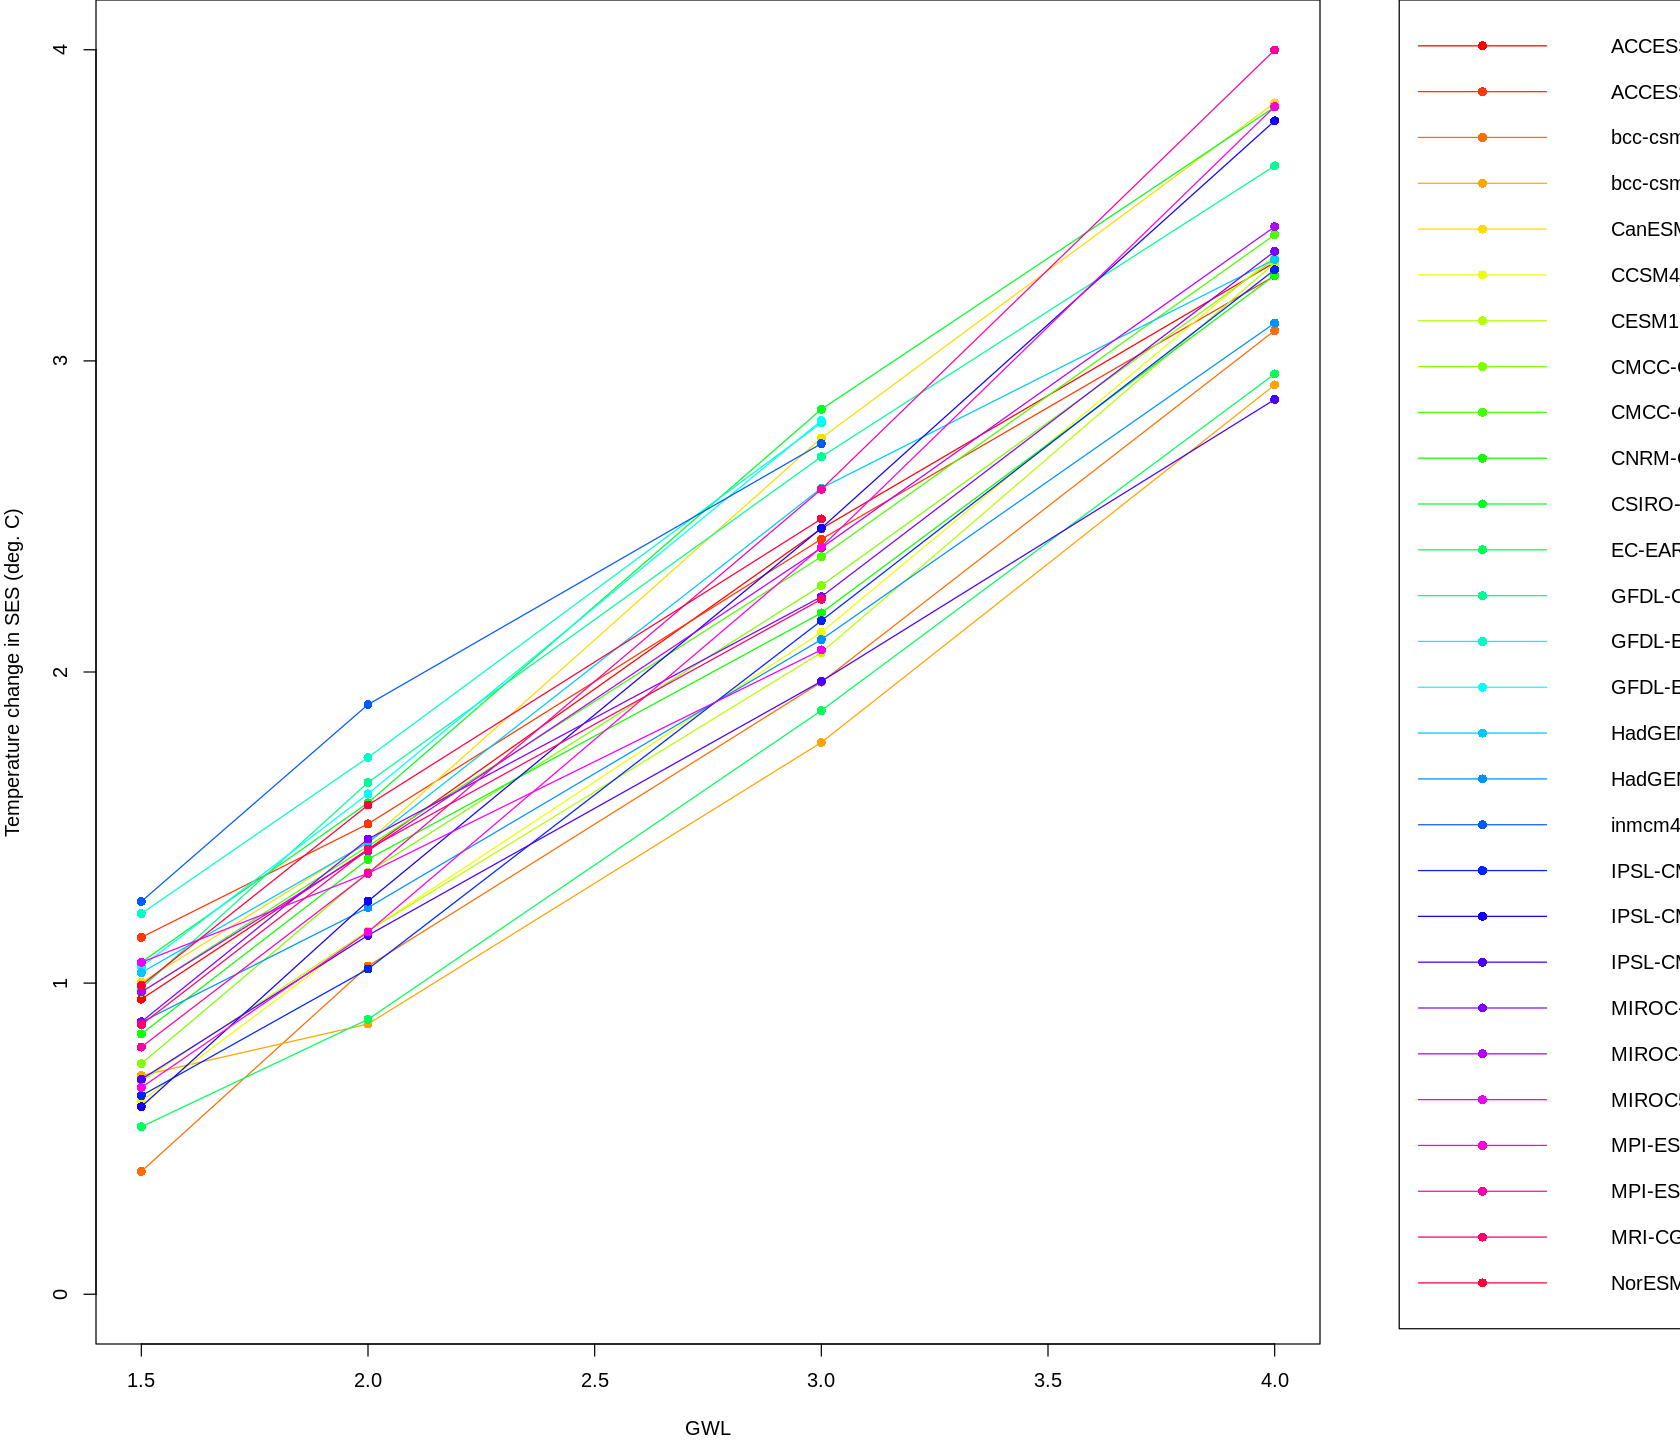

In [17]:
par(mar=c(4, 4, 0, 15), xpd=TRUE) # make room for the legend
plot(NA, xlim=c(1.5, 4), ylim=c(0,4), xlab = "GWL", ylab = "Temperature change in SES (deg. C)", type = "n")
model.names <- row.names(WL.cmip5$SES)
n.models <- length(model.names)
line.colors <- rainbow(n.models)
gwls <- as.numeric(periods)
for (i in 1:n.models){
    lines(gwls, WL.cmip5$SES[i,], col = line.colors[i])
    points(gwls, WL.cmip5$SES[i,], col = line.colors[i], pch=16)
}
legend("topright", legend=model.names, pch=16, lty=1, col=line.colors, inset=c(-1,0))

Once the data is obtained, the user is free to apply any additional operations. For instance, in the next cell we will compute the ensemble mean for the SES region using the `apply` function.

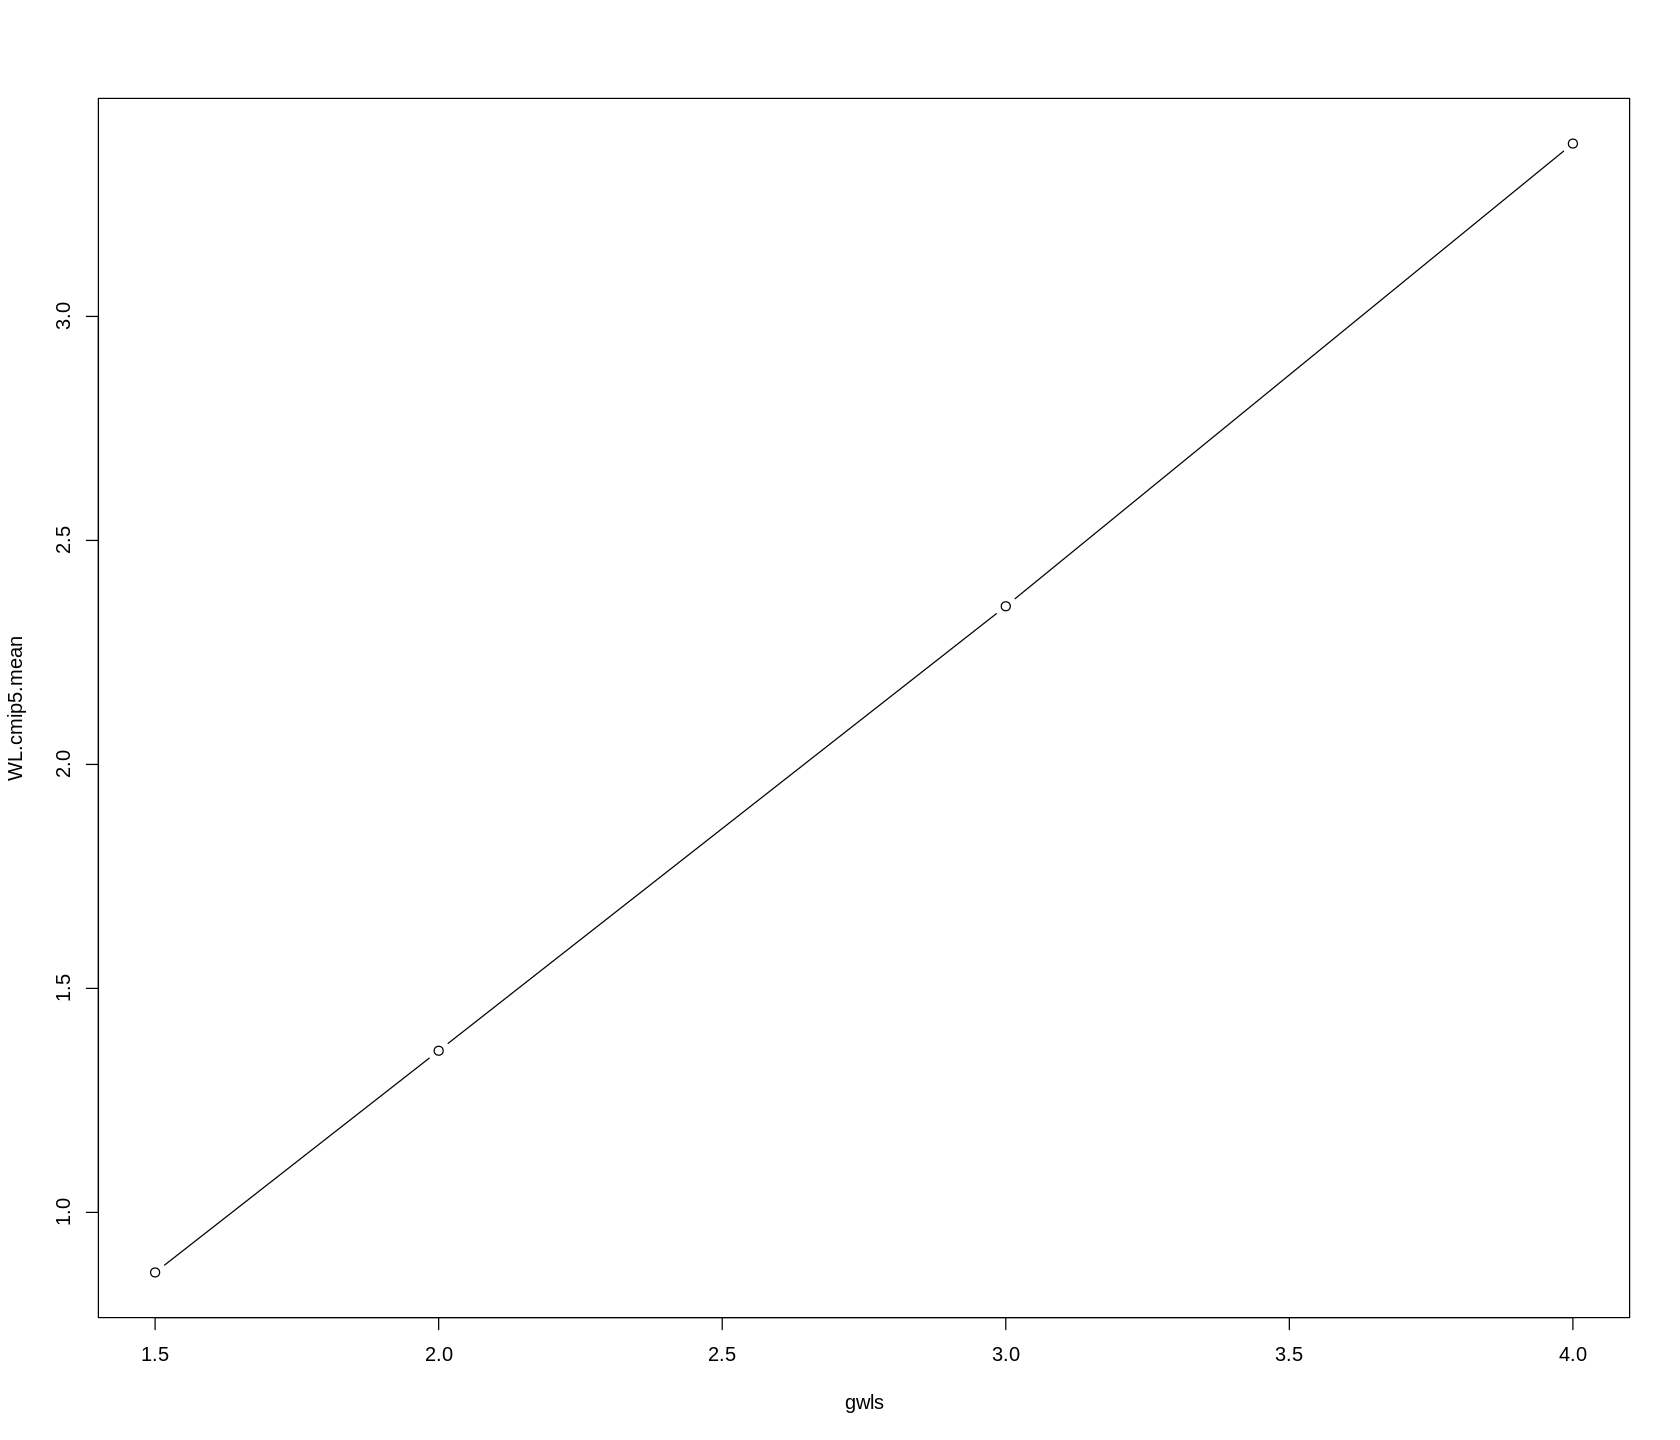

In [18]:
WL.cmip5.mean <- apply(WL.cmip5$SES, 2, mean, na.rm = T)
plot(gwls, WL.cmip5.mean, type = "b")

Use a `for` or a `lapply` loop to apply the same operation for all available regions:

In [19]:
WL.cmip5.mean <- lapply(WL.cmip5, function(x) apply(x, 2, mean, na.rm = T))

Convert from `list` to `data.frame` and add WL names:

In [20]:
df <- data.frame("WL" = gwls, WL.cmip5.mean)
df

WL,NSA,SES
<dbl>,<dbl>,<dbl>
1.5,1.080562,0.8659782
2.0,1.673109,1.3608302
3.0,2.962334,2.3530096
4.0,4.307700,3.3858477


We can use this data frame to illustrate the `lattice` plotting functionalities.

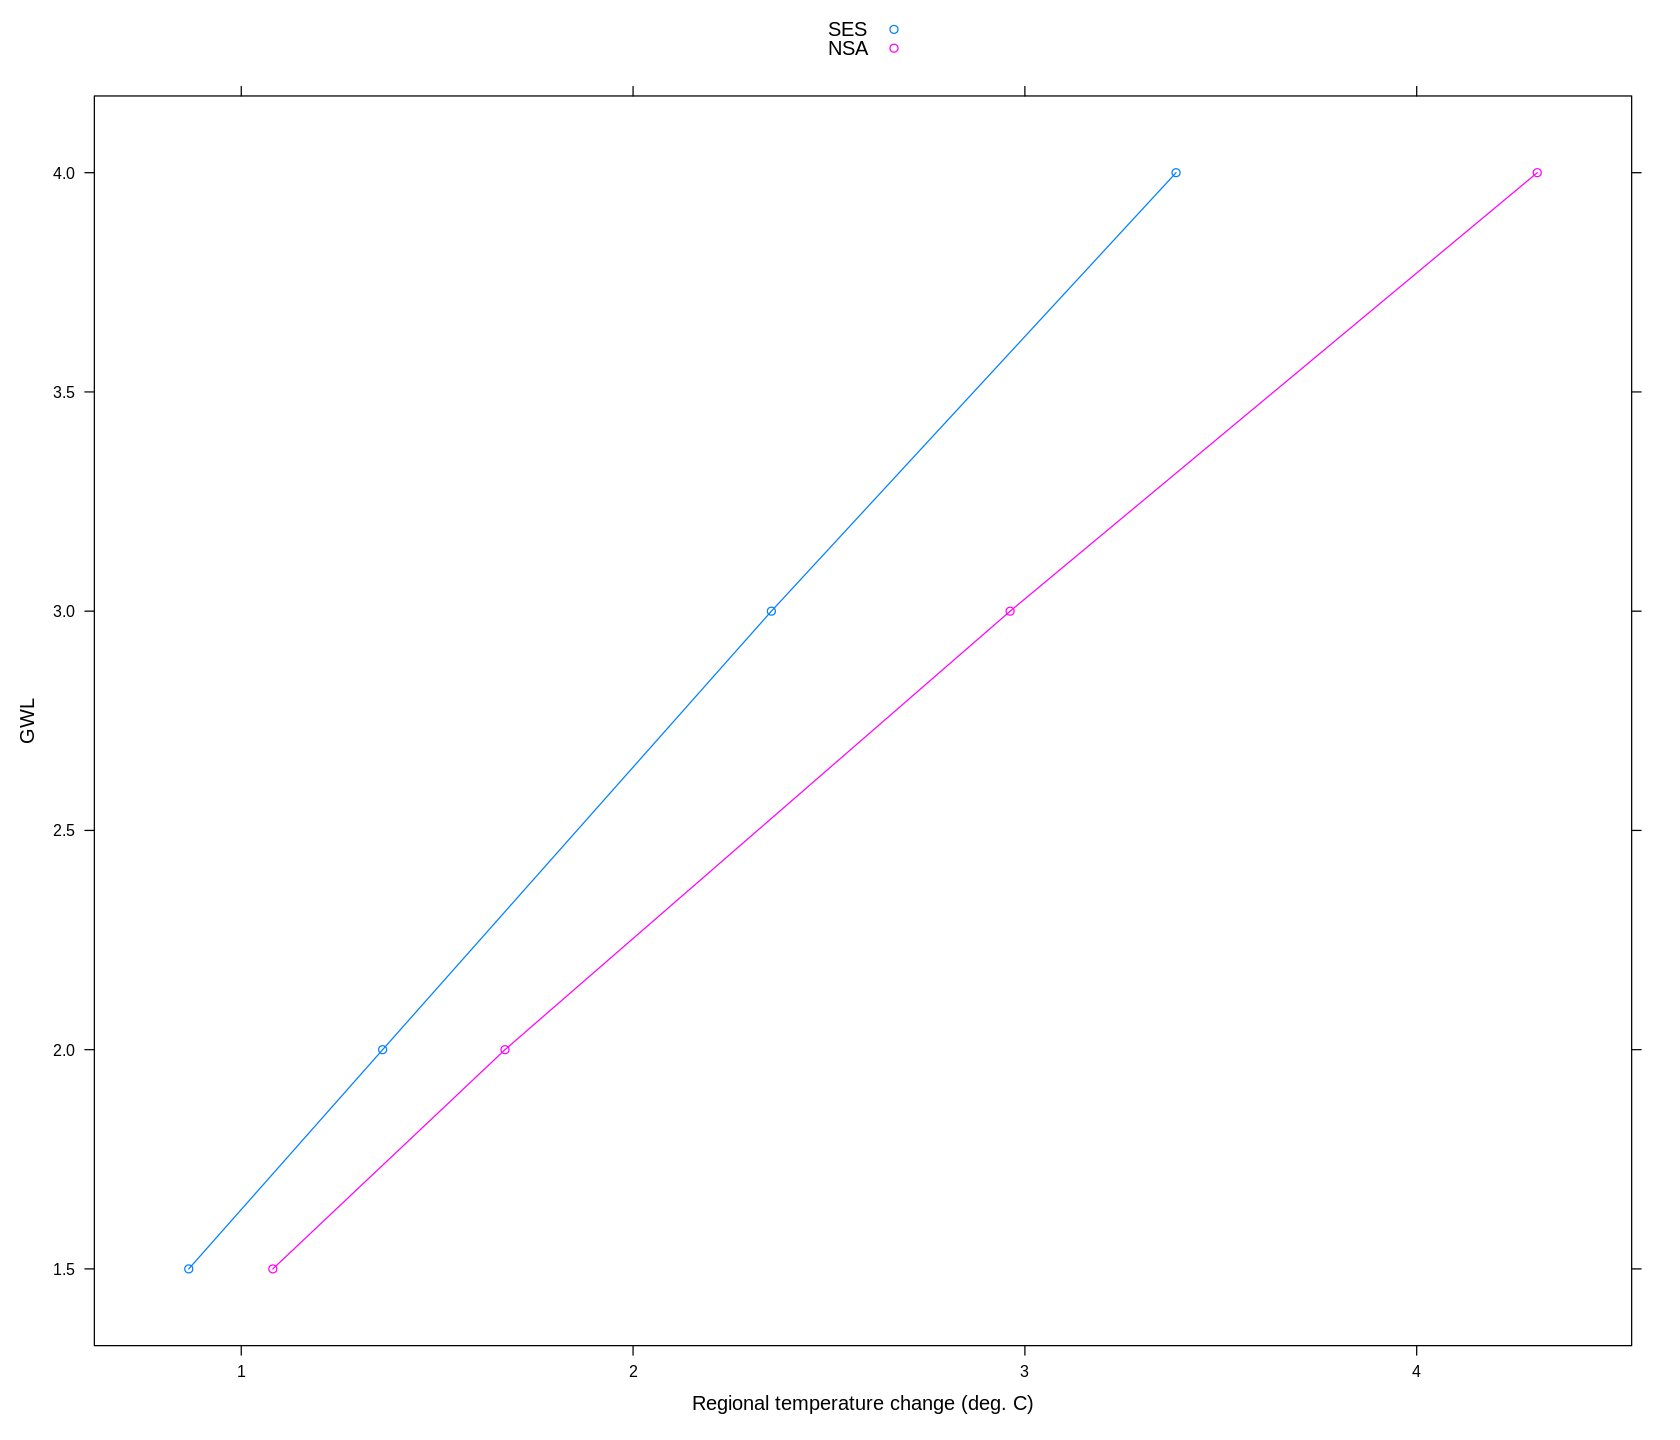

In [21]:
xyplot(WL~SES + NSA, data = df, 
       xlab = "Regional temperature change (deg. C)", ylab = "GWL",
       type = "b",
       auto.key = TRUE)

### Session Information

In [22]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.2 LTS

Matrix products: default
BLAS/LAPACK: /home/maialen/miniconda3/envs/Atlas/lib/libopenblasp-r0.3.17.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=es_ES.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=es_ES.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=es_ES.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=es_ES.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] gridExtra_2.3       latticeExtra_0.6-29 lattice_0.20-44    
[4] httr_1.4.2          magrittr_2.0.1      repr_1.1.3         

loaded via a namespace (and not attached):
 [1] uuid_0.1-4         R6_2.5.0           jpeg_0.1-8.1       rlang_0.4.11      
 [5] fansi_0.4.2        tools_3.6.3        grid_3.6